In [5]:
from evaluate import load_model_with_weights
from pipeline.load import MyDataset
from torchvision.transforms.functional import to_tensor
import torch
from matplotlib import pyplot as plt
import numpy as np
import torch.nn.functional as F
from PIL import Image
import pdb

In [6]:
device = torch.device('cuda')

In [7]:
def img_frombytes(data):
#     print(size)
    databytes = np.packbits(data, axis=1)
    return Image.frombytes(mode='1', size=(1024,1024), data=databytes)

def output_to_pred_imgs(output, dim=0):

    np_pred = torch.max(output, dim=dim)[1].cpu().numpy()
    return img_frombytes(np_pred)

def display_pred(model, index=None):
    dataset = MyDataset(in_dir="training_data")
    if index==None:
        index = np.random.randint(0, len(dataset))
    image_tuple=dataset[index]
    print(image_tuple[2])
    print(index)
    inputs = to_tensor(image_tuple[0]).unsqueeze(0).to(device)
    with torch.no_grad():
        prediction = model(inputs)
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
    ax[0][0].imshow(image_tuple[0])
    ax[0][1].imshow(image_tuple[1])
    ax[1][0].imshow(prediction[0].cpu().squeeze()[0])
    ax[1][1].imshow(prediction[0].cpu().squeeze()[1])
    ax[1][2].imshow(prediction[0].argmax(dim=1).cpu().squeeze())
    ax[2][0].imshow(prediction[2].cpu().squeeze()[0])
    ax[2][1].imshow(prediction[2].cpu().squeeze()[1])
    ax[2][2].imshow(prediction[2].argmax(dim=1).cpu().squeeze())
        
    output = prediction[2]
    np_pred = torch.max(output, dim=0)[1].cpu().numpy()

In [8]:
pred_index = 29999

First trial with Jaccard / Lovasz

In [9]:
model = load_model_with_weights(model_name="10-03-2020_23-58__full_lovasz_trial", use_lovasz=True)
dataset = MyDataset(in_dir="training_data")
model.to(device)
display_pred(model, index=pred_index);

UnpicklingError: invalid load key, '\x1f'.

Older Models

training_data
training_data/images/*.jpg
training_data
training_data/images/*.jpg
training_data/images/33cae6_22528_21504_i.jpg
29999


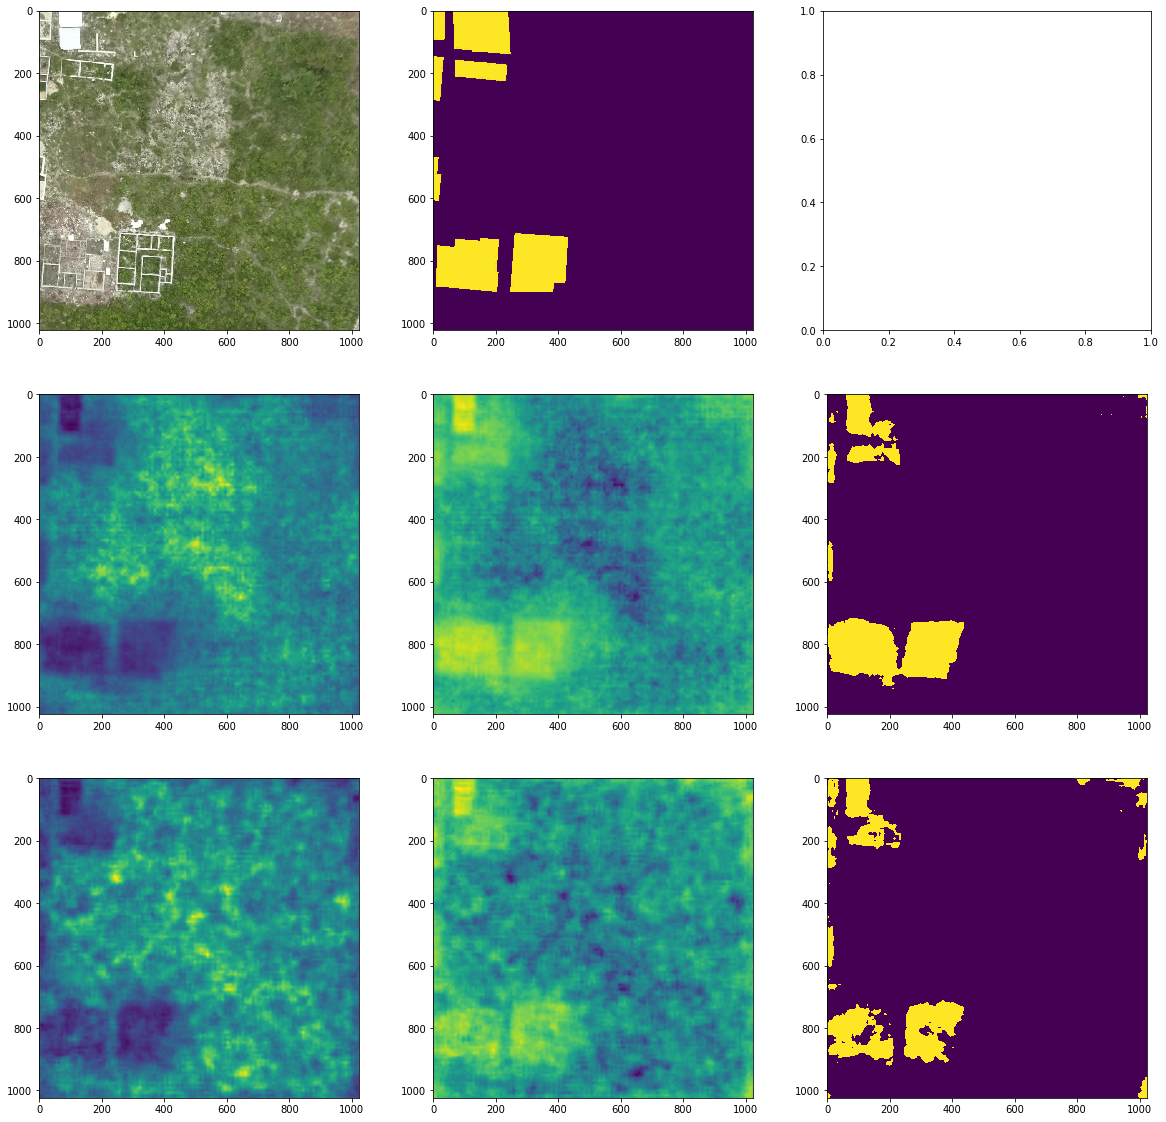

In [9]:
model = load_model_with_weights(
    model_name="10-03-2020_17-20__420px_val_clean_fastfcnLR_batch16_chkpt"
)
dataset = MyDataset(in_dir="training_data")
model.to(device);
display_pred(model, index=pred_index);

In [10]:
model = Evaluate.load_model_with_weights(model_name="08-03-2020_22-51__random_split_test_nograd")
dataset = MyDataset(in_dir="training_data")
model.to(device)
display_pred(model, index=pred_index);

NameError: name 'Evaluate' is not defined

training_data
training_data/images/*.jpg
training_data
training_data/images/*.jpg
training_data/images/33cae6_22528_21504_i.jpg
29999


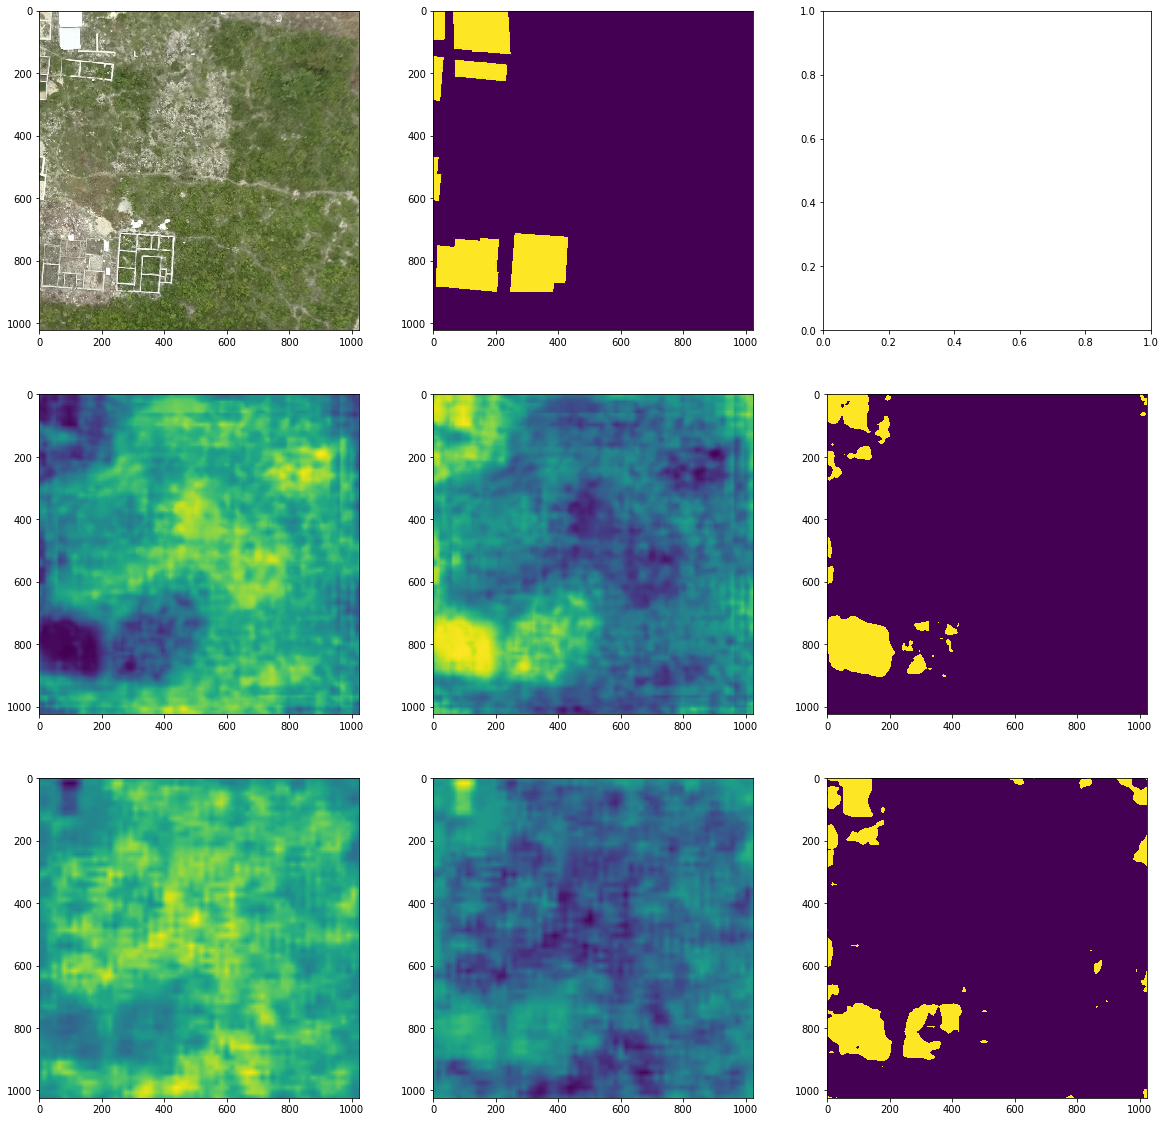

In [48]:
model = load_model_with_weights(model_name="08-03-2020_12-06__random_split_test")
dataset = MyDataset(in_dir="training_data")
model.to(device)
display_pred(model, index=pred_index);

In [4]:
model2 = load_model_with_weights(model_name="06-03-2020_20-41__first_dataset_train_5ep")
dataset = MyDataset(in_dir="training_data")
model2.to(device)
display_pred(model2, index=pred_index)

NameError: name 'load_model_with_weights' is not defined

training_data
training_data/images/*.jpg
training_data
training_data/images/*.jpg
training_data/images/33cae6_22528_21504_i.jpg
29999


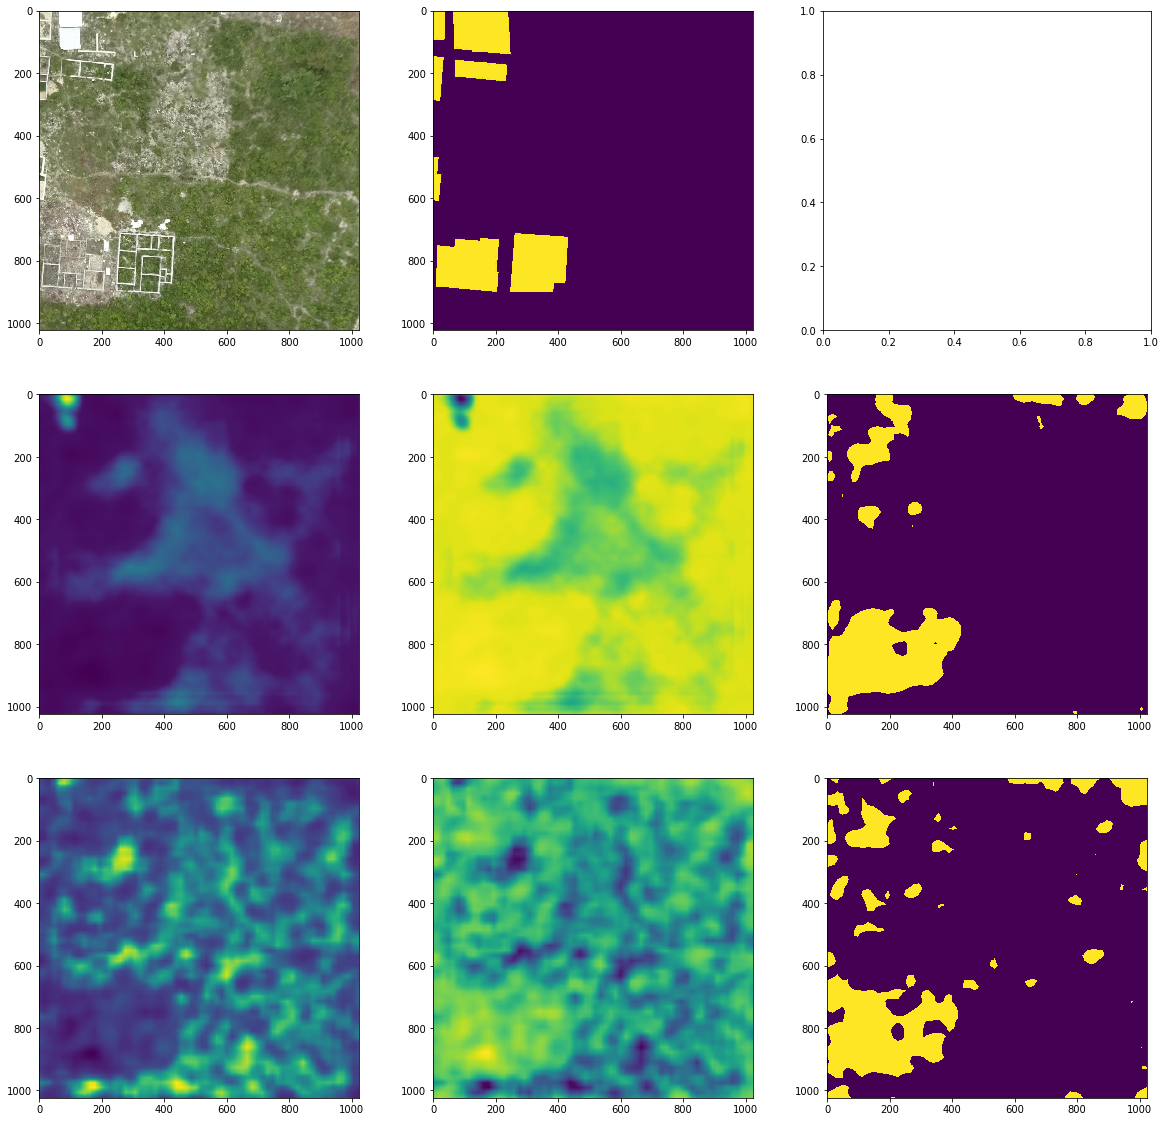

In [50]:
model3 = load_model_with_weights(model_name="07-03-2020_15-57")
dataset = MyDataset(in_dir="training_data")
model3.to(device)
display_pred(model3, index=pred_index);